# Exploratory data analysis.

In this notebook we will perform eda to get a sense of how the data looks like. There will be some plotting to answer some questions.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
data = pd.read_csv(r"D:\Documentos\Vida_profesional\Coding\Projects\customer_churn_ml\data\raw\raw.csv")

In [10]:
data.head()
    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
print(data['MultipleLines'].unique())
print(data['PhoneService'].unique())
print(data['OnlineSecurity'].unique())
print(data['OnlineBackup'].unique())
print(data['DeviceProtection'].unique())
print(data['TechSupport'].unique())
print(data['StreamingTV'].unique())
print(data['StreamingMovies'].unique())
print(data['PaperlessBilling'].unique())

['No phone service' 'No' 'Yes']
['No' 'Yes']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No']


It appears that the only numerical columns are tenure, MonthlyCharges and TotalCharges. The rest seems to be categorical data. 
\
Let's plot the churn distribution.



Churn
No     5174
Yes    1869
Name: count, dtype: int64


<BarContainer object of 2 artists>

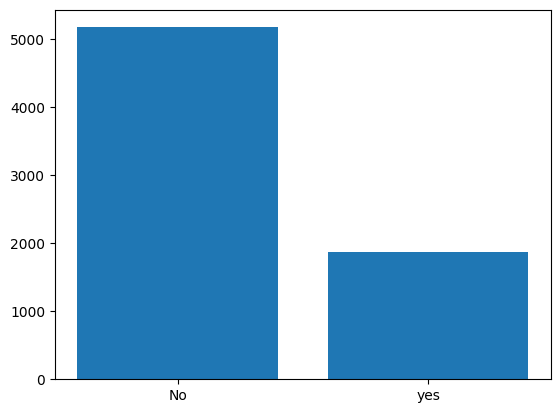

In [13]:
churn =data['Churn'].value_counts() 
print(churn)
plt.bar(['No','yes'],churn)

There are about 2.5 times more people that don't churn than people that churn.\

We want to measure correlation between categorical variables, the best way to test this is using the $\chi^2$ square test.\
To do this we will do a combination between the categorical variables and compute the $\chi$ square test on each of them.

In [14]:
from scipy.stats import chi2_contingency
from itertools import product

df_cat = pd.DataFrame(data=data.dtypes,columns=['a']).reset_index()
#print(df_cat)
CatVariables = list(df_cat['index'].loc[df_cat['a']=='object']) 
print(CatVariables)
df_cat = data[CatVariables]
df_cat = df_cat.dropna()

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


Now we want to to pair categories with one and other to see how correlated they are between them 

In [15]:
from itertools import combinations

cat_var_prod = list(combinations(CatVariables,2))


In [16]:
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],(chi2_contingency(pd.crosstab(
                                    df_cat[i[0]], df_cat[i[1]])))[1]))

In [17]:
PValues=[]
for i in result:
    if i[2]<0.01:
        PValues.append(i)

chi_test_output = pd.DataFrame(PValues, columns = ['var1','var2','coeff'])
## Using pivot function to convert the above DataFrame into a crosstab
print('p-values from the chi2_contengency function')
print(chi_test_output.pivot(index='var1', columns='var2', values='coeff'))

p-values from the chi2_contengency function
var2                      Churn       Contract  Dependents  DeviceProtection  \
var1                                                                           
Contract          5.863038e-258            NaN         NaN               NaN   
Dependents         4.924922e-43   6.152878e-92         NaN      1.067414e-38   
DeviceProtection  5.505219e-122  1.067975e-267         NaN               NaN   
InternetService   9.571788e-160  3.289672e-129         NaN      0.000000e+00   
MultipleLines      3.464383e-03   7.795766e-19         NaN     1.032519e-183   
OnlineBackup      2.079759e-131  1.474616e-202         NaN      0.000000e+00   
OnlineSecurity    2.661150e-185  1.095261e-275         NaN      0.000000e+00   
PaperlessBilling   4.073355e-58            NaN         NaN               NaN   
Partner            2.139911e-36  9.271466e-135         0.0      3.695779e-43   
PaymentMethod     3.682355e-140            NaN         NaN               NaN

The only column we care about is churn but we have to see how correlated are some variables between themselves.
There seems to be some coliniarity between variables \

The fact that most variables are correlated with churn doesn't matter, correlation doesn't mean causation.